# 質數日

In [ ]:
x = input("請輸入一個日期: ")
for i in range(8):
    number = int(x)
    isPrime = True
    for prime in Primes:
        
        if number<=1:
            isPrime = False
            break
        elif prime>=number:
            break
        elif number % prime == 0:
            isPrime = False
            break
    
    if isPrime:
        print(' '*i, x, '  是質數')
    else:
        print(' '*i, x, '不是質數')
        

    
    string = list(str(x))
    del string[0]
    x = ''.join(string)

In [ ]:
def era(x):
    Primes = []
    Prime = [True]*(x+1)
    for i in range(2, int(x**0.5+1)):
        if Prime[i]:
            for j in range(i*2,x+1,i):
                Prime[j]=False
    Primes.extend(i for i in range(2, x+1) if Prime[i])
    print(Primes)

In [ ]:
era(10000)

In [ ]:
import numpy as np

In [ ]:
def ScrambleGenerator():
    Scramble = []
    for i in range(20):
        if i == 0:
            x = np.random.choice(range(6))
        else:    
            x = np.random.choice(range(6), p = prob)
            
        if x==0: #U moves
            prob = [0, 0.2, 0.2, 0.2, 0.2, 0.2] #設定下個步驟不會是U, 下面以此類推
            move = ['U', 'U\'', 'U2'] #可以順時針轉90度(U),逆時針轉90度(U'),轉180度(U2), 下面以此類推
            y = np.random.choice(range(3)) #先設這三種轉法的機率相等, 下面以此類推
            Scramble.append(move[y])
        elif x==1: #D moves
            prob = [0.2, 0, 0.2, 0.2, 0.2, 0.2]
            move = ['D', 'D\'', 'D2']
            y = np.random.choice(range(3))
            Scramble.append(move[y])
        elif x==2: #L moves
            prob = [0.2, 0.2, 0, 0.2, 0.2, 0.2]
            move = ['L', 'L\'', 'L2']
            y = np.random.choice(range(3))
            Scramble.append(move[y])
        elif x==3:#R moves
            prob = [0.2, 0.2, 0.2, 0, 0.2, 0.2]
            move = ['R', 'R\'', 'R2']
            y = np.random.choice(range(3))
            Scramble.append(move[y])
        elif x==4:#F moves
            prob = [0.2, 0.2, 0.2, 0.2, 0, 0.2]
            move = ['F', 'F\'', 'F2']
            y = np.random.choice(range(3))
            Scramble.append(move[y])
        else: #B moves
            prob = [0.2, 0.2, 0.2, 0.2, 0.2, 0]
            move = ['B', 'B\'', 'B2'] 
            y = np.random.choice(range(3)) 
            Scramble.append(move[y])
    
    print("Scramble:", ' '.join((Scramble)))   

In [ ]:
ScrambleGenerator()

# 魔術方塊打亂公式產生器

In [ ]:
def ScrambleGenerator():
    r = []
    Scramble = []
    
    for i in range(20):
               
        if i == 0:
            x = np.random.choice(range(6))
            r.append(x)
            block = 0
        else:
            x = np.random.choice(range(6), p = prob)
            r.append(x)

            #加入這段的原因是因為在打亂魔方中，有些步驟的先後次序不一樣不會影響打亂的狀態，
            #簡單舉例: U D' U 等同於 U2 D, 也等同於D U2, 所以要將像U D U'這種重複的打亂公式刪除。
            #這邊採用的做法是若前面已經連續出現U D, 則限制打亂公式下一個步驟不要再出現U跟D
    
            if r[i-1]==0 and r[i]==1:
                block = 0.2
            elif r[i-1]==1 and r[i]==0:
                block = 0.2
            elif r[i-1]==2 and r[i]==3:
                block = 0.2
            elif r[i-1]==3 and r[i]==2:
                block = 0.2
            elif r[i-1]==4 and r[i]==5:
                block = 0.2
            elif r[i-1]==5 and r[i]==4:
                block = 0.2
            else:
                block = 0
        
        y = np.random.choice(range(3)) #先設順時針轉90度, 逆時針轉90度, 轉180度這三種轉法的機率相等
    
        if x==0: #U moves
            prob = [0, 0.2-block, 0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4)] 
            #設定下個步驟不會是U, 下面以此類推
            move = ['U', 'U\'', 'U2'] #可以順時針轉90度(U),逆時針轉90度(U'),轉180度(U2), 下面以此類推
        elif x==1: #D moves
            prob = [0.2-block, 0, 0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4)]
            move = ['D', 'D\'', 'D2']
        elif x==2: #L moves
            prob = [0.2+(block*1/4), 0.2+(block*1/4), 0, 0.2-block, 0.2+(block*1/4), 0.2+(block*1/4)]
            move = ['L', 'L\'', 'L2']
        elif x==3:#R moves
            prob = [0.2+(block*1/4), 0.2+(block*1/4), 0.2-block, 0, 0.2+(block*1/4), 0.2+(block*1/4)]
            move = ['R', 'R\'', 'R2']
        elif x==4:#F moves
            prob = [0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4), 0, 0.2-block]
            move = ['F', 'F\'', 'F2']
        else: #B moves
            prob = [0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4), 0.2+(block*1/4), 0.2-block, 0]
            move = ['B', 'B\'', 'B2']
            
        Scramble.append(move[y])    
    
    print("Scramble:", ' '.join((Scramble)))   

In [ ]:
ScrambleGenerator()

# 射擊小遊戲

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
plt.rcParams["figure.figsize"] = [12, 9] #調整plt作圖大小

In [70]:
def ShootingGame(shots):
    #畫靶紙
    for i in range(1, 11):
        facecolor = 'white'
        color = 'black'
        if i % 2 != 0:
            facecolor = 'black'
            color = 'white'
        if i == 10:
            facecolor = 'red'
            color = 'none' 
        circle = plt.Circle((0, 0), radius=10.5-i, edgecolor = "black", fc=facecolor) #黑白相間，中間紅心
        plt.text(0, 10-i, i,color = color, fontsize = 24, fontweight = 'bold', fontfamily = 'Impact', 
                 horizontalalignment = 'center', verticalalignment = 'center') #畫出數字(分數)
        plt.gca().add_patch(circle)
        plt.axis("scaled")
    
    distance = (90.25, 72.25, 56.25, 42.25, 30.25, 20.25, 12.25, 6.25, 2.25, 0.25) #距離的標準
    total_score = 0
    for i in range(1, shots+1):
        x = np.random.uniform(-0.5, 0.5)
        y = np.random.uniform(-0.5, 0.5)
        d = x**2 + y**2
        score = 0
        for j in range(10):
            if d < distance[j]:
                score+=1
        total_score += score
        # print("第 {} 發得 {} 分".format(i, score)) #選定每發的位置以及分數
    
        plt.plot(x, y, 'ro') #畫出子彈(?)
        
        plt.text(x, y+0.5, score, color = 'red', fontsize = 12, fontweight = 'bold', fontfamily = 'Comic Sans MS', 
                 horizontalalignment = 'center', verticalalignment = 'center') #畫出每發的分數
    print("總共獲得 {} 分".format(total_score))
    print("平均獲得 {:.2f} 分".format(total_score/shots))
    plt.show()

總共獲得 10 分
平均獲得 10.00 分


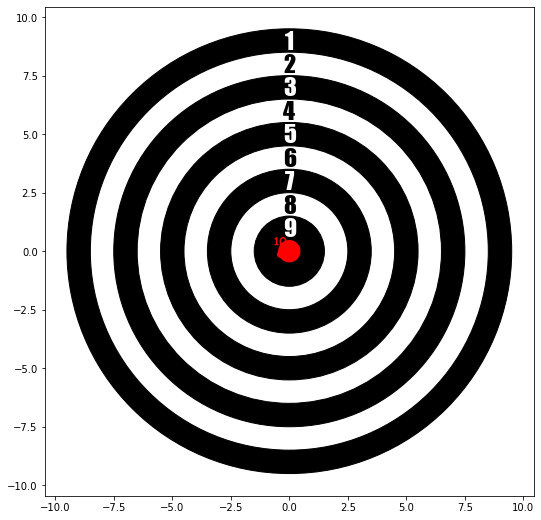

In [72]:
ShootingGame(1)